<h1>Solving One-Dimensional Schrodinger equation in python

$-\frac{ħ^{2}}{2m}\frac{d^{2}ψ(x)}{dx^{2}}+V(x)ψ(x)=Eψ(x)$

by Ishaq Hadi 22003298

**Importing necessary modules**

We will need to import the modules `numpy` and `matplotlib.pyplot` to perform numerical computations and create plots, respectively.

In [32]:
import numpy as np
import matplotlib.pyplot as plt

**Defining all the constants**

ħ is the reduced Planck Constant, (ħ = h/2π) = 1\
m is the mass of the particle = 1 \
α = 1 \
λ = 4

In [ ]:
# Constants
hbar = 1.0  # Planck's reduced constant
m = 1.0     # Mass of the particle
alpha = 1.0
lmbda = 4.0

**Defining all functions**

First we will define the potential which is: 

$V(x)=\frac{ħ^{2}}{2m}α^{2}λ(λ-1)[\frac{1}{2}-\frac{1}{cosh^{2}(αx)}]$ 

Next will be the schrodinger equation itself:

$ψ''(x)+\frac{2m}{\hbar^{2}}[E - V(x)]ψ(x) = 0$ 

This Schrodinger equation is the same form as the Sturm-Liouville problem - thus it can be solved using any linear shooting method. 

We can also use these parameters if we want to use regular shooting method:

*   *$p(x) = 1$*
*   *$q(x) = 2m[E - V(x)]/ħ^{2}$*
*   *$r(x) = 0$*

However we will use Numerov method instead in the upcoming solution.




In [ ]:
# Potential function
def potential(x):
    return (hbar**2 / (2 * m)) * alpha**2 * lmbda * (lmbda - 1) * (0.5 - 1 / (np.cosh(alpha * x)**2))

# Schrödinger equation
def schrodinger(x, psi, E):
    return (2 * m / hbar**2) * (E - potential(x)) * psi


We will use Numerov Method which is one of the shooting methods for solving second-order differential equations numerically in this case the Schrodinger equation. The Numerov method improves accuracy by using a higher-order approximation that incorporates terms from the Taylor expansion, making it particularly effective for equations with smoothly varying solutions.

The general equation for the Numerov method:

$y''(x) + g(x)y(x) = 0$

So for the Schrodinger equation: 

$g(x) = \frac{2m}{\hbar^{2}}[E - V]$

and 

$ψ(x) = y(x)$

Numerov's Method approximates the wavefunction $ψ(x)$ at discrete points $x_{i} = x_{0} + idx$, where $dx$ is the iteration step size. It uses the following recurrence relation:

$ψ_{i+1} = \frac{2(1-\frac{5}{12}dx^{2}g_{i})ψ_{i} - (1+\frac{1}{12}dx^{2}g_{i-1})ψ_{i-1}}{1+\frac{1}{12}dx^{2}g_{i+1}}$

Where:


*   $ψ_{i+1}, ψ_{i}, ψ_{i-1}$ are the wavefunction values at $x_{i+1}, x_{i}, x_{i-1}$ respectively
*   $g_{i} = g(x_{i}) = \frac{2m}{\hbar^{2}}[V(x_{i}) - E]$

In [35]:
# Numerov method
def numerov(E, x, psi0, psi1):
    dx = x[1] - x[0]
    psi = np.zeros_like(x)
    psi[0], psi[1] = psi0, psi1
    for i in range(1, len(x) - 1):
        k_minus = 2 * m / hbar**2 * (E - potential(x[i - 1]))
        k = 2 * m / hbar**2 * (E - potential(x[i]))
        k_plus = 2 * m / hbar**2 * (E - potential(x[i + 1]))
        psi[i + 1] = (2 * (1 - 5 / 12 * dx**2 * k) * psi[i] - (1 + dx**2 / 12 * k_minus) * psi[i - 1]) / (1 + dx**2 / 12 * k_plus)
    return psi

Since we know that quantum particles are quantized so it will have discrete energy levels (specific levels of n). So, the energy of the particle will be given by the formula:

$E_{n}=\frac{ħ^{2}}{2m}α^{2}[\frac{λ(λ-1)}{2}-(λ-1-n)^{2}]$

For $n = 0, 1, 2, ...$




In [ ]:
# Exact energy levels for the system
def energy(n):
    return (hbar**2 / (2 * m)) * alpha**2 * ((lmbda * (lmbda - 1)) / 2 - (lmbda - 1 - n)**2)

For this solution we will find the first 3 energy levels. You can also find the energy of the 4th level by changing the value of **num_levels**

In [ ]:
# Calculate energy levels
energy_levels = []
num_levels = 3  # Number of eigenvalues to compute
for n in range(num_levels):
    energy_levels.append(energy(n))

# Print the energy levels
print("Eigenvalues (analytical):", energy_levels)

Eigenvalues (analytical): [-1.5, 1.0, 2.5]


Next, we will set the parameters for the x-axis for this solution.

In [38]:
# Parameters
x_min, x_max = -4, 4
num_points = 1000
x = np.linspace(x_min, x_max, num_points)

This is the plot of the potential of the Schorodinger equation.

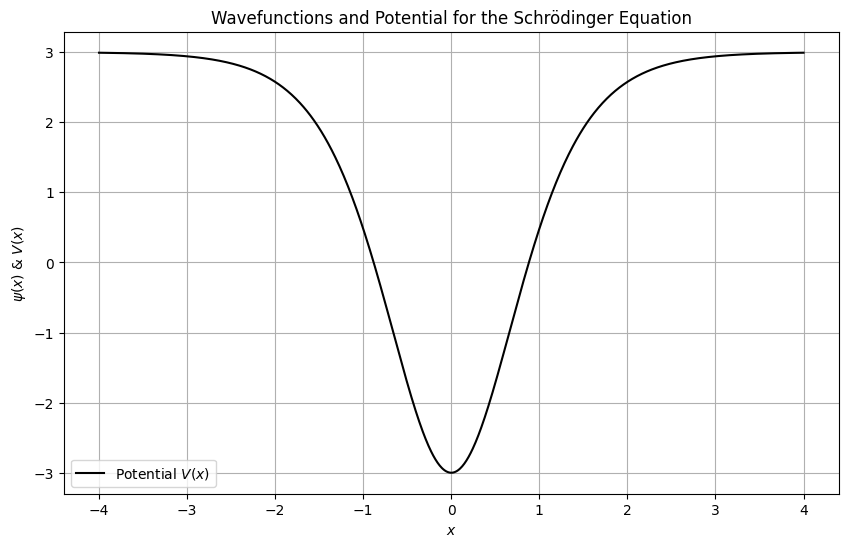

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot potential
V = potential(x)
plt.plot(x, V, label="Potential $V(x)$", color="black", linewidth=1.5)

plt.title("Wavefunctions and Potential for the Schrödinger Equation")
plt.xlabel("$x$")
plt.ylabel(r"$\psi(x)$ & $V(x)$")
plt.legend()
plt.grid()
plt.show()

Finally we can plot it all together and show the intersection points between each wavefunction and the main potential function. The intersection points however is not fully accurate because of rounding but it is a close estimate to the actual value. 

Tadaaa we have solved the 1-D Schrodinger equation in python:

Intersection at x = -0.669, V(x) = -0.953
Intersection at x = 0.661, V(x) = -0.990
Intersection at x = -1.341, V(x) = 1.562
Intersection at x = 0.901, V(x) = 0.082
Intersection at x = -2.631, V(x) = 2.877
Intersection at x = 2.727, V(x) = 2.898


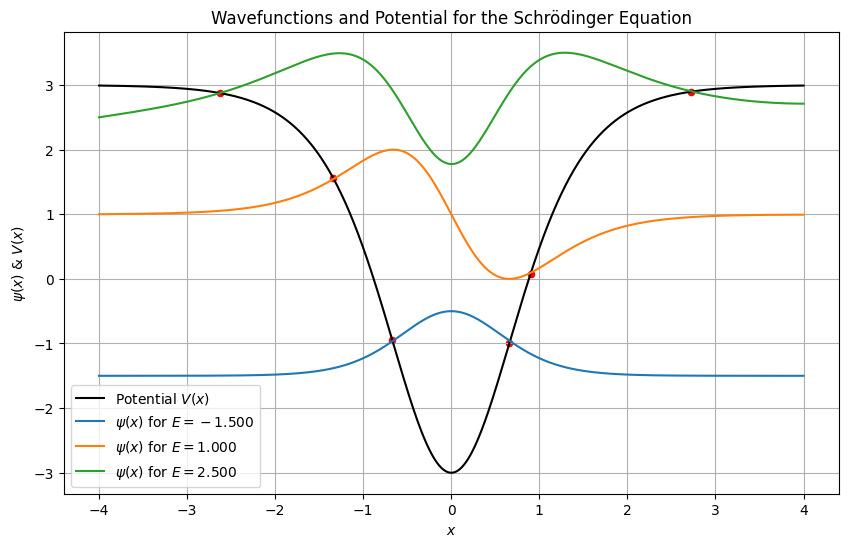

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot potential
V = potential(x)
plt.plot(x, V, label="Potential $V(x)$", color="black", linewidth=1.5)

# Plot wavefunctions
for E_n in energy_levels:
    psi = numerov(E_n, x, psi0=0, psi1=1e-5)
    psi /= np.max(np.abs(psi))  # Normalize
    plt.plot(x, psi + E_n, label=rf"$\psi(x)$ for $E = {E_n:.3f}$")
        # Find exact intersection points
    diff = (psi + E_n) - V
    sign_change_indices = np.where(np.diff(np.sign(diff)))[0]
    for idx in sign_change_indices:
        intersection_x = x[idx]
        intersection_y = V[idx]
        plt.scatter(intersection_x, intersection_y, color="red", s=20)
        print(f"Intersection at x = {intersection_x:.3f}, V(x) = {intersection_y:.3f}")

plt.title("Wavefunctions and Potential for the Schrödinger Equation")
plt.xlabel("$x$")
plt.ylabel(r"$\psi(x)$ & $V(x)$")  # Use raw string (r"")
plt.legend()
plt.grid()
plt.show()